# Examples of Random Walk 

## Introduction
A classical random walk is implemented on a graph which consists of a set of vertices (V) and edges between each vertex. 
We have a walker at any arbitrary vertex on the graph, and the direction in which the walker moves is completely random. For example, we might say its determined by fair coin flip. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:

""" A Python Class
A simple Python graph class, demonstrating the essential 
facts and functionalities of graphs.
"""

import random

class Graph(object):

    def __init__(self, graph_dict, vertex):
        """ initializes a graph object 
            If no dictionary or None is given, 
            an empty dictionary will be used
        """
        self._graph_dict = graph_dict
        self.V = vertex
    

    def edges(self, vertice):
        """ returns a list of all the edges of a vertice"""
        return self._graph_dict[vertice]
        
    def all_vertices(self):
        """ returns the vertices of a graph as a set """
        return set(self._graph_dict.keys())

    def all_edges(self):
        """ returns the edges of a graph """
        return self.__generate_edges()

    def add_vertex(self, vertex):
        """ If the vertex "vertex" is not in 
            self._graph_dict, a key "vertex" with an empty
            list as a value is added to the dictionary. 
            Otherwise nothing has to be done. 
        """
        if vertex not in self._graph_dict:
            self._graph_dict[vertex] = []

    def add_edge(self, edge):
        """ assumes that edge is of type set, tuple or list; 
            between two vertices can be multiple edges! 
        """
        edge = set(edge)
        vertex1, vertex2 = tuple(edge)
        for x, y in [(vertex1, vertex2), (vertex2, vertex1)]:
            if x in self._graph_dict:
                self._graph_dict[x].add(y)
            else:
                self._graph_dict[x] = [y]
    def add_edge(self, s, d):
        self._graph_dict[s].add(d)

    def __generate_edges(self):
        """ A static method generating the edges of the 
            graph "graph". Edges are represented as sets 
            with one (a loop back to the vertex) or two 
            vertices 
        """
        edges = []
        for vertex in self._graph_dict:
            for neighbour in self._graph_dict[vertex]:
                if {neighbour, vertex} not in edges:
                    edges.append({vertex, neighbour})
        return edges
    
    def __iter__(self):
        self._iter_obj = iter(self._graph_dict)
        return self._iter_obj
    
    def __next__(self):
        """ allows us to iterate over the vertices """
        return next(self._iter_obj)

    def __str__(self):
        res = "vertices: "
        for k in self._graph_dict:
            res += str(k) + " "
        res += "\nedges: "
        for edge in self.__generate_edges():
            res += str(edge) + " "
        return res

    def st_con(self,start,end, num_vertices):
        path = []
        my_graph = self._graph_dict
        neighbors = my_graph[start] # a list of adjacent vertices
        neighbors = list(neighbors)
        counter = 0
        print(start)
        start = random.choice(neighbors)
        print("Its neighbors are...")
        print(neighbors)
        print("Start of the walk.....\n")
        print(start)
        
        if (start == end):
            print("YES")
            return "YES"

        while(start != end):
            neighbors = my_graph[start] # a list of adjacent vertices
            neighbors = list(neighbors)
            print(neighbors)
            start = random.choice(neighbors)
           
            print(start)
            counter += 1
            print("Step: ", counter)
            if (counter == num_vertices ** 3):
                print("NO")
                break
    
    def random_walk(self, start, num_iter):
        path = []
        my_graph = self._graph_dict
        neighbors = my_graph[start] # a list of adjacent vertices
        neighbors = list(neighbors)
        counter = 0
        #print(start)
        start = random.choice(neighbors)
       # print("Its neighbors are...")
       # print(neighbors)
        #print("Start of the walk.....\n")
        #print(start)
        counts = dict()
        counts[start] = 1
        for i in range(num_iter):
            neighbors = my_graph[start] # a list of adjacent vertices
            neighbors = list(neighbors)
            #print(neighbors)
            start = random.choice(neighbors)
            if start in counts.keys():
                counts[start] += 1    
            else:
                counts[start] = 1
            #print(start)
            #print(counts)
            #print("Step: ", i)
        #plt.bar(counts.keys(), counts.values(), color='g')
        #print(start)
        return start

        
        
        # dfs
    def dfs(self, d, visited_vertex):
        visited_vertex[d] = True
        print(d, end='')
        for i in self._graph_dict[d]:
            if not visited_vertex[i]:
                self.dfs(i, visited_vertex)
                
    def fill_order(self, d, visited_vertex, stack):
        visited_vertex[d] = True
        for i in self._graph_dict[d]:
            if not visited_vertex[i]:
                self.fill_order(i, visited_vertex, stack)
        stack = stack.append(d)

      # transpose the matrix
    def transpose(self):
        g = Graph(self._graph_dict, self.V)


        for i in self._graph_dict:
            for j in self._graph_dict[i]:
                g.add_edge(j, i)
        return g


     # Print stongly connected components
    def print_scc(self):
        print("WORKING>>")
        stack = []
        visited_vertex = [False] * (self.V)
        print(visited_vertex)

        for i in range(self.V):
            if not visited_vertex[i]:
                self.fill_order(i, visited_vertex, stack)

        gr = self.transpose()

        visited_vertex = [False] * (self.V)

        while stack:
            print("in second loop")
            i = stack.pop()
            if not visited_vertex[i]:
                print("in ")
                gr.dfs(i, visited_vertex)
                print("")
        




## S-T connectivity

The first example of an application of a random walk is the S-T connectivity problem. In this, we start of at a vertex _S_ in our graph and wish to find out if it is connected to vertex _T_. While this might seem easy for a computer with memory that can keep track of the vertexs it has visited. In our problem, we assume our computer has limited memory and it cannot keep track of all the points it has visited (this may be true in large databases). 
So, our computer performs a random walk, choosing between the different adjacent vertexs with equal probability. If the computer reaches _T_ then it will output __YES__, otherwise if it doesnt see _T_ after $T= V^3$ steps, then it will output __NO__. As given in Kempe, Review of Quantum Walks, it has been seen that even such a simple method has a success probability of $1/2$, given that __S__ and __T__ are actually connected. So, even an output of __NO__ means there is still a chance that the two vertices may be connected.

In [3]:
# start = a,,,,, my_graph[a] = values // d
#making a dictionary g containing vertices of graph and their connections
g = {"0000" : {"0001","0010", "0100", "1000"},
     "0001" : {"1001", "0101", "0011", "0000"},
     "0010" : {"1010","0110","0000","0011"},
     "0011" : {"1011","0111","0001","0010"},
     "0100": {"1100","0000","0110","0101"},
     "0101" : {"1101","0001","0111","0100"},
     "0110": {"1110","0010","0100","0111"},
     "0111": {"1111","0011","0101","0110"},
     "1000": {"0000","1100","1010","1001"},
     "1001": {"0001","1101","1011","1000"},
     "1010": {"0010","1110","1000", "1011"},
     "1011": {"0011","1111","1001","1010"},
     "1100": {"0100","1000","1110","1101"},
     "1101": {"0101","1001","1111","1100"},
     "1110": {"0110","1010","1100","1111"},
     "1111": {"0111","1011","1101","1110"},
    }
#intiializing graph object
graph = Graph(g,7)

for vertice in graph:
    print(f"Edges of vertice {vertice}: ", graph.edges(vertice))
graph.st_con("0000" , "1111", 16)


Edges of vertice 0000:  {'1000', '0010', '0001', '0100'}
Edges of vertice 0001:  {'0011', '1001', '0000', '0101'}
Edges of vertice 0010:  {'0011', '0110', '0000', '1010'}
Edges of vertice 0011:  {'1011', '0010', '0001', '0111'}
Edges of vertice 0100:  {'0110', '0101', '0000', '1100'}
Edges of vertice 0101:  {'0001', '1101', '0111', '0100'}
Edges of vertice 0110:  {'0111', '0010', '1110', '0100'}
Edges of vertice 0111:  {'0011', '0101', '0110', '1111'}
Edges of vertice 1000:  {'1001', '0000', '1010', '1100'}
Edges of vertice 1001:  {'1011', '1000', '0001', '1101'}
Edges of vertice 1010:  {'1000', '1011', '0010', '1110'}
Edges of vertice 1011:  {'0011', '1001', '1111', '1010'}
Edges of vertice 1100:  {'1000', '1101', '1110', '0100'}
Edges of vertice 1101:  {'0101', '1001', '1111', '1100'}
Edges of vertice 1110:  {'0110', '1100', '1010', '1111'}
Edges of vertice 1111:  {'1011', '1110', '1101', '0111'}
0000
Its neighbors are...
['1000', '0010', '0001', '0100']
Start of the walk.....

0100


In [10]:

data = dict()
for i in range(100):
    x = graph.random_walk("0000",1)
    if x in data.keys():
        data[x] += 1    
    else:
        data[x] = 1
        
print(data)
        

{'0000': 17, '1010': 11, '1100': 12, '1001': 15, '0011': 11, '0110': 16, '0101': 18}


<BarContainer object of 7 artists>

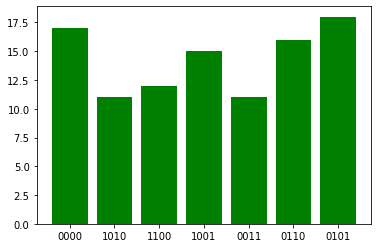

In [11]:
 plt.bar(data.keys(), data.values(), color='g')